In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# Load some data, brah
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 
              'sqft_living15':float, 'grade':int, 'yr_renovated':int, 
              'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 
              'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 
              'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 
              'id':str, 'sqft_lot':int, 'view':int}
df_train = pd.read_csv('./data/kc_house_train_data.csv', dtype=dtype_dict)

Since we'll be using house price as our target variable, let's see how those values are distributed with respect to our first predicting variable, sqft of living space:

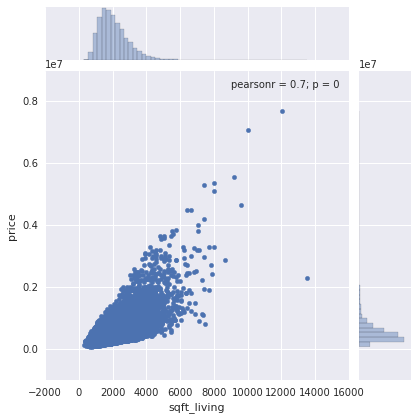

In [6]:
sns.jointplot('sqft_living', 'price', data=df_train)

A Kernel Density plot displays the probability of seeing any (x, y) pair.

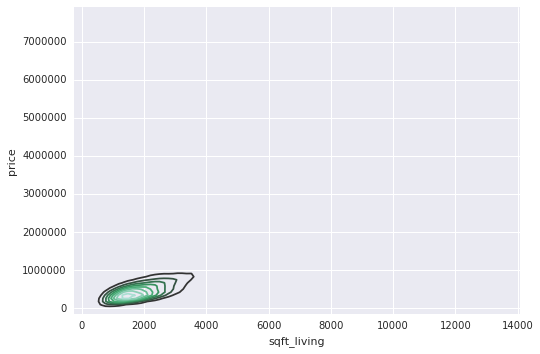

In [7]:
sns.kdeplot(df_train['sqft_living'], df_train['price'])

In [8]:
# Describe the top 10 most expensive houses
df_train.sort_values(by='price', ascending=False).head(10).describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,5395830.000000,5.100000,5.575000,8484.000000,29646.400000,0.500000,2.500000,3.200000,12.100000,6331.00000,2153.000000,1984.100000,599.700000,47.626800,-122.230900,3854.000000,19953.40000
std,1143842.355154,0.567646,1.328376,1743.286806,9731.201367,0.527046,1.840894,0.421637,0.567646,1144.67317,1439.344372,32.746331,965.623006,0.058065,0.040096,565.296382,6471.31105
min,4208000.000000,4.000000,3.000000,6430.000000,13068.000000,0.000000,0.000000,3.000000,11.000000,4820.00000,0.000000,1910.000000,0.000000,47.557000,-122.323000,3030.000000,8800.00000
25%,4542000.000000,5.000000,5.062500,7402.500000,24196.000000,0.000000,0.500000,3.000000,12.000000,5660.00000,1432.500000,1985.000000,0.000000,47.582100,-122.229750,3462.500000,15776.25000
50%,5205400.000000,5.000000,5.625000,8005.000000,27558.500000,0.500000,3.500000,3.000000,12.000000,6275.00000,2190.000000,2000.000000,0.000000,47.626050,-122.216500,3825.000000,22579.00000
75%,5515000.000000,5.000000,6.000000,9530.000000,36761.000000,1.000000,4.000000,3.000000,12.000000,6647.50000,2847.500000,2002.500000,1490.250000,47.644950,-122.210250,4225.000000,24550.50000
max,7700000.000000,6.000000,8.000000,12050.000000,45517.000000,1.000000,4.000000,4.000000,13.000000,8570.00000,4820.000000,2009.000000,2009.000000,47.749300,-122.189000,4740.000000,26788.00000


In [9]:
def simple_linear_regression(X, y):
    """Solves for the best-fit line using _a_ closed-form solution.
    
    numerator = (mean of X * Y) - (mean of X)*(mean of Y)
    denominator = (mean of X^2) - (mean of X)*(mean of X)
    slope = numerator / denominator
    intercept = mean(y) - slope * mean(X)
    """
    Xy = X * y
    mean_x, mean_x2, mean_y, mean_xy = X.mean(), (X**2).mean(), y.mean(), Xy.mean()
    slope = (mean_xy - mean_x * mean_y) / (mean_x2 - (mean_x**2))
    intercept = mean_y - slope * mean_x
    return intercept, slope

In [10]:
intercept, slope = simple_linear_regression(df_train.loc[:, 'sqft_living'], df_train.loc[:, 'price'])
print("Intercept = {b}, Slope = {m}".format(b=intercept, m=slope))

Intercept = -47116.07907289488, Slope = 281.95883963034294


In [11]:
def get_regression_predictions(input_feature, intercept, slope):
    return intercept + input_feature * slope

In [12]:
X, y = df_train.loc[:, 'sqft_living'], df_train.loc[:, 'price']
df_predictions = pd.DataFrame({'sqft_living': X,
                               'predictions': get_regression_predictions(X, intercept, slope),
                               'price': y})
# Calculate the squared error for each point.
df_predictions['squared_error'] = y.sub(df_predictions['predictions']).pow(2)
df_predictions.head()

,predictions,price,sqft_living,squared_error
0,285595.351691,221900,1180,4.057098e+09
1,677518.138777,538000,2570,1.946531e+10
2,169992.227442,180000,770,1.001555e+08
3,505523.246603,604000,1960,9.697671e+09
4,426574.771506,510000,1680,6.959769e+09


In [13]:
print("Predicted price for a 2650 sqft house: ${:.2f}".format(get_regression_predictions(2650, intercept, slope)))

Predicted price for a 2650 sqft house: $700074.85


In [14]:
def get_residual_sum_of_squares(input_feature, output, intercept,slope):
    preds = get_regression_predictions(input_feature, intercept, slope)
    return output.sub(preds).pow(2).sum()

In [15]:
print("RSS of Price predictions on training data: {:e}".format(
        get_residual_sum_of_squares(df_train['sqft_living'],
                                    df_train['price'],
                                    intercept, 
                                    slope)))

RSS of Price predictions on training data: 1.201918e+15


In [16]:
def inverse_regression_predictions(output, intercept, slope):
    return (output - intercept) / slope

In [17]:
print("Estimated sq. ft. for a $800k home: {:.0f}".format(inverse_regression_predictions(8e5, intercept, slope)))

Estimated sq. ft. for a $800k home: 3004


In [18]:
df_test = pd.read_csv('./data/kc_house_test_data.csv', dtype=dtype_dict)

In [19]:
sqft_living_intercept, sqft_living_slope = intercept, slope
print("RSS of Price predictions using sqft_living on test data: {:e}".format(
        get_residual_sum_of_squares(df_test['sqft_living'],
                                    df_test['price'],
                                    sqft_living_intercept, 
                                    sqft_living_slope)))
bedroom_intercept, bedroom_slope = simple_linear_regression(df_train['bedrooms'], df_train['price'])
print("RSS of Price predictions using bedrooms on test data: {:e}".format(
        get_residual_sum_of_squares(df_test['bedrooms'],
                                    df_test['price'],
                                    bedroom_intercept, 
                                    bedroom_slope)))

RSS of Price predictions using sqft_living on test data: 2.754029e+14
RSS of Price predictions using bedrooms on test data: 4.933646e+14


Week 2 Assignment: https://www.coursera.org/learn/ml-regression/supplement/7xN9c/reading-exploring-different-multiple-regression-models-for-house-price

In [23]:
import numpy as np

In [28]:
# Comments taken from the assignment page - jdb

# Squaring bedrooms will increase the separation between not many bedrooms (e.g. 1) 
# and lots of bedrooms (e.g. 4) since 1^2 = 1 but 4^2 = 16. Consequently this 
# variable will mostly affect houses with many bedrooms.
df_train['bedrooms_squared'] = df_train['bedrooms'] * df_train['bedrooms']
df_test['bedrooms_squared'] = df_test['bedrooms'] * df_test['bedrooms']

# Bedrooms times bathrooms is what's called an "interaction" variable. 
# It is large when both of them are large.
df_train['bed_bath_rooms'] = df_train['bedrooms'] * df_train['bathrooms']
df_test['bed_bath_rooms'] = df_test['bedrooms'] * df_test['bathrooms']

# Taking the log of square feet has the effect of bringing large values 
# closer together and spreading out small values.
df_train['log_sqft_living'] = np.log(df_train['sqft_living'])
df_test['log_sqft_living'] = np.log(df_test['sqft_living'])

# Adding latitude to longitude is non-sensical but we will do it anyway
df_train['lat_plus_long'] = df_train['lat'] * df_train['long']
df_test['lat_plus_long'] = df_test['lat'] * df_test['long']

In [30]:
from sklearn import linear_model

In [77]:
features = {
    'model1': ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long'],
    'model2': ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long', 'bed_bath_rooms'],
    'model3': ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long', 'bed_bath_rooms', 
               'bedrooms_squared', 'log_sqft_living', 'lat_plus_long']
}
train_y = df_train['price']
model1 = linear_model.LinearRegression()
model1.fit(df_train.loc[:, features['model1']], train_y)
model2 = linear_model.LinearRegression()
model2.fit(df_train.loc[:, features['model2']], train_y)
model3 = linear_model.LinearRegression()
model3.fit(df_train.loc[:, features['model3']], train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
print("Model1.Bathrooms weight: {:f}".format(model1.coef_[4]))
print("Model2.Bathrooms weight: {:f}".format(model2.coef_[4]))

Model1.Bathrooms weight: -309374.351268
Model2.Bathrooms weight: -294298.969138


In [121]:
from sklearn.metrics import mean_squared_error

In [124]:
print("MSE of model1 (Train): {:e}".format(
        mean_squared_error(train_y, model1.predict(df_train.loc[:, features['model1']]))))

print("MSE of model2 (Train): {:e}".format(
        mean_squared_error(train_y, model2.predict(df_train.loc[:, features['model2']]))))
        
print("MSE of model3 (Train): {:e}".format(
        mean_squared_error(train_y, model3.predict(df_train.loc[:, features['model3']]))))

MSE of model1 (Train): 5.567648e+10
MSE of model2 (Train): 5.513228e+10
MSE of model3 (Train): 5.153745e+10


Currently, our models rank by number of features, descending. That is, "more is better". But lets see how this plays out on the test data.

In [126]:
test_y = df_test['price']
print("MSE of model1 (test): {:e}".format(
        mean_squared_error(test_y, model1.predict(df_test.loc[:, features['model1']]))))

print("MSE of model2 (test): {:e}".format(
        mean_squared_error(test_y, model2.predict(df_test.loc[:, features['model2']]))))
        
print("MSE of model3 (test): {:e}".format(
        mean_squared_error(test_y, model3.predict(df_test.loc[:, features['model3']]))))


MSE of model1 (test): 5.332241e+10
MSE of model2 (test): 5.282040e+10
MSE of model3 (test): 6.119764e+10


Ranking (best to worst): model2, model1, model3. My guess is model3 became over-fit to the training data, and the 'lat_plus_long' feature is probably misleading its predictions. Let's see model3's weights:

In [119]:
def abs_sort(x):
    return abs(x[1])

def print_weights(features, weights):
    """Print features by magnitude of weight, descending."""
    # Align off the longest word
    longest = max(len(f) for f in features)
    tmpl = "{{:>{:d}}}: {{:.2e}}".format(longest)
    for feature, weight in sorted(zip(features, weights), key=abs_sort, reverse=True):
        print(tmpl.format(feature, weight))

In [118]:
print_weights(features['model3'], model3.coef_)

             lat: -1.40e+08
            long: 5.43e+07
   lat_plus_long: -1.15e+06
 log_sqft_living: -5.61e+05
       bathrooms: 6.75e+04
        bedrooms: 3.66e+04
  bed_bath_rooms: -9.02e+03
bedrooms_squared: -6.96e+03
     sqft_living: 5.32e+02


-1.15e6 is one of the larger weights, and we know it to be a non-sensical feature.

## Week 2, Assignment 2

https://www.coursera.org/learn/ml-regression/supplement/tcfe4/reading-implementing-gradient-descent-for-multiple-regression